# Import most important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [0]:
dataset_name = "framingham.csv"
df = pd.read_csv(dataset_name)

## A first view of the dataset

In [5]:
df.shape

(4240, 16)

In [6]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,m,39,col,n,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,f,46,hsog,n,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,m,48,shs,y,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,f,61,scovs,y,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,f,46,scovs,y,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,f,48,hsog,y,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,f,44,shs,y,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,f,52,hsog,n,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,m,40,scovs,n,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4135 non-null   object 
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(5), object(3)
memory usage: 530.1+ KB


### Name changes

We will apply the following changes in order to make the dataset easier to work with:

* Replace 'male' values 'f' and 'm' to 0 and 1 respectively

* Replace 'currentSmoker' values 'n' and 'y' to 0 and 1 respectively

* Replace 'education' values 'shs', 'hsog', 'scovs' and 'col' to 1, 2, 3 and 4 respectively

In [0]:
df['male'] = df['male'].map({'f': 0, 'm': 1})
df['currentSmoker'] = df['currentSmoker'].map({'n': 0, 'y':1})
df['education'] = df['education'].map({'shs': 1, 'hsog': 2, 'scovs': 3, 'col': 4})

# Exploratory Data Analysis

In [11]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Categorical data

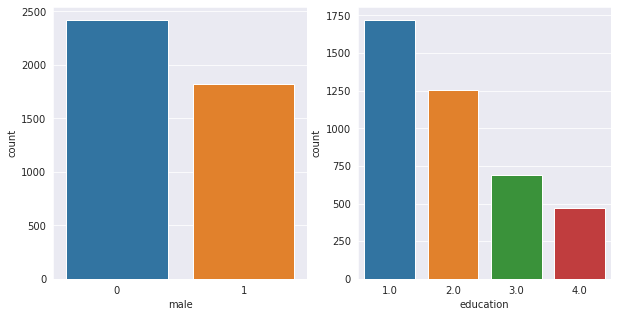

In [12]:
fig = plt.figure(figsize=(10,5)) 
sns.set_style("darkgrid")

plt.subplot(1, 2, 1)
sns.countplot(x=df['male'])

plt.subplot(1, 2, 2)
sns.countplot(x=df['education'])

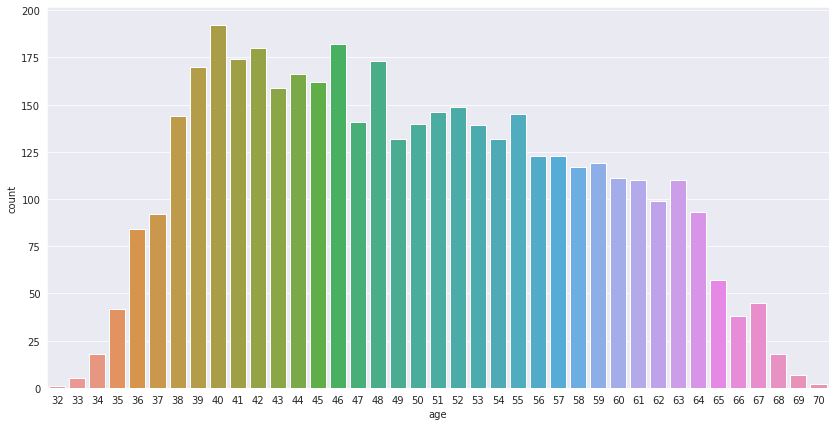

In [13]:
fig = plt.figure(figsize=(14,7)) 
sns.set_style("darkgrid")
sns.countplot(x=df['age'])

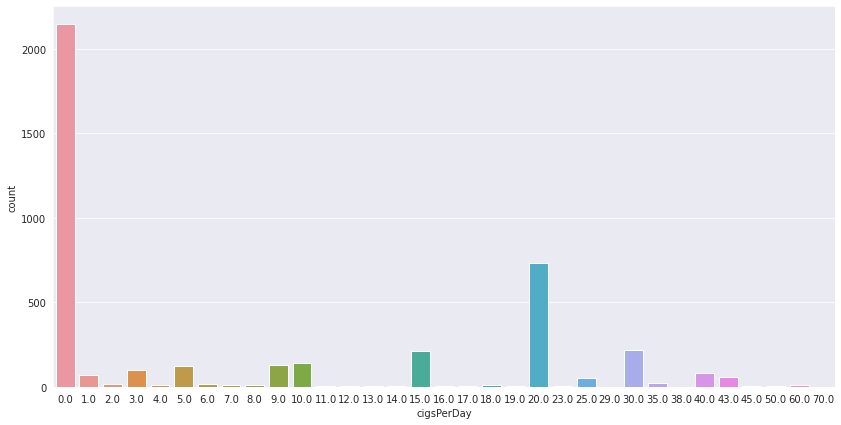

In [14]:
fig = plt.figure(figsize=(14,7)) 
sns.set_style("darkgrid")
sns.countplot(x=df['cigsPerDay'])

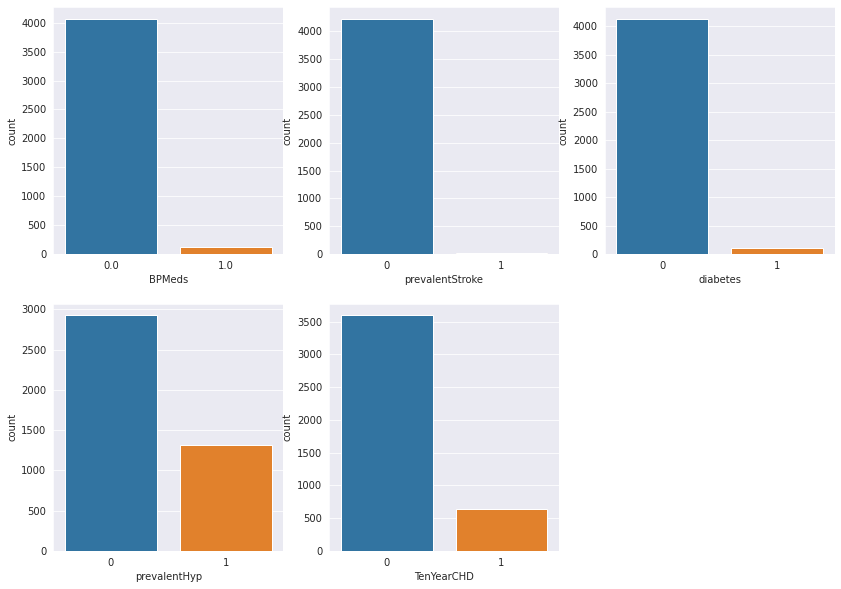

In [35]:
fig = plt.figure(figsize=(14, 10)) 
sns.set_style("darkgrid")

plt.subplot(2, 3, 1)
sns.countplot(x=df['BPMeds'])

plt.subplot(2, 3, 2)
sns.countplot(x=df['prevalentStroke'])

plt.subplot(2, 3, 3)
sns.countplot(x=df['diabetes'])

plt.subplot(2, 3, 4)
sns.countplot(x=df['prevalentHyp'])

plt.subplot(2, 3, 5)
sns.countplot(x=df['TenYearCHD'])

plt.show()

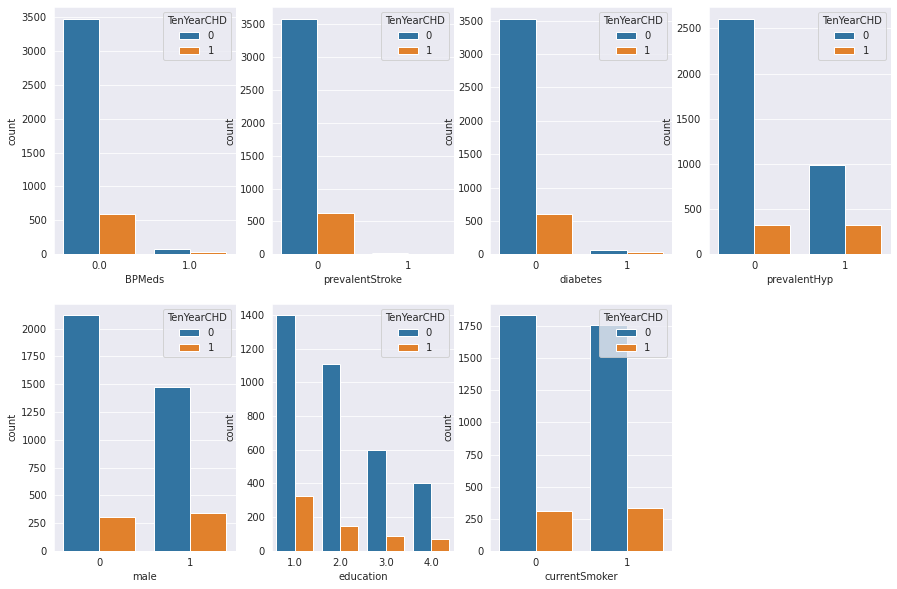

In [32]:
fig = plt.figure(figsize=(15, 10)) 
sns.set_style("darkgrid")

plt.subplot(2, 4, 1)
sns.countplot(x="BPMeds", hue="TenYearCHD", data=df)

plt.subplot(2, 4, 2)
sns.countplot(x="prevalentStroke", hue="TenYearCHD", data=df)

plt.subplot(2, 4, 3)
sns.countplot(x="diabetes", hue="TenYearCHD", data=df)

plt.subplot(2, 4, 4)
sns.countplot(x="prevalentHyp", hue="TenYearCHD", data=df)

plt.subplot(2, 4, 5)
sns.countplot(x="male", hue="TenYearCHD", data=df)

plt.subplot(2, 4, 6)
sns.countplot(x="education", hue="TenYearCHD", data=df)

plt.subplot(2, 4, 7)
sns.countplot(x="currentSmoker", hue="TenYearCHD", data=df)

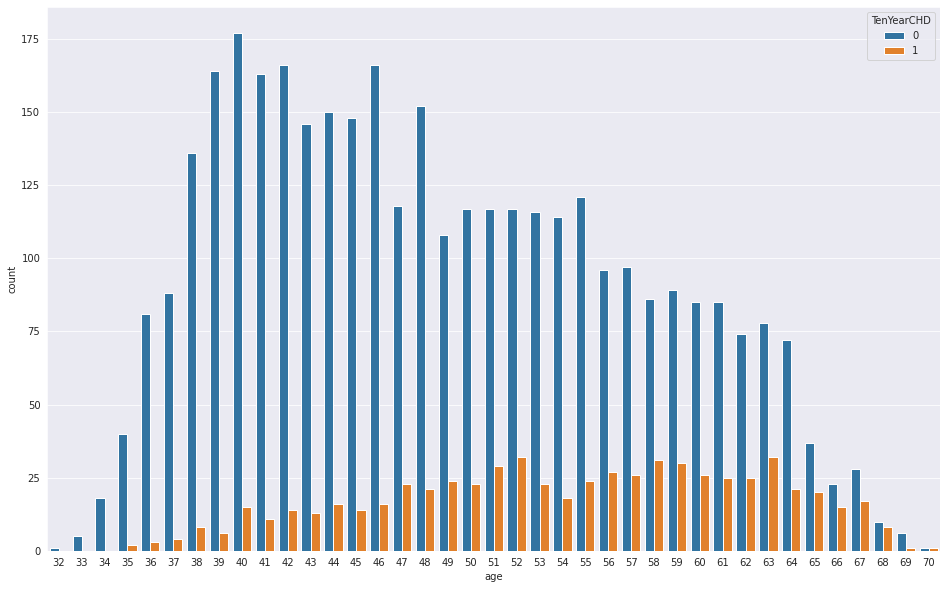

In [46]:
fig = plt.figure(figsize=(16, 10)) 
sns.countplot(x="age", hue="TenYearCHD", data=df)

## Continuous data

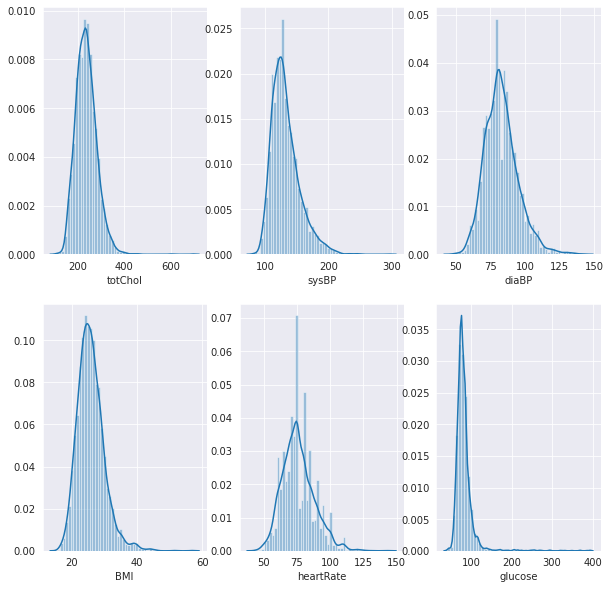

In [41]:
fig = plt.figure(figsize=(10, 10)) 

plt.subplot(2, 3, 1)
sns.distplot(df['totChol'], kde=True)

plt.subplot(2, 3, 2)
sns.distplot(df['sysBP'], kde=True)

plt.subplot(2, 3, 3)
sns.distplot(df['diaBP'], kde=True)

plt.subplot(2, 3, 4)
sns.distplot(df['BMI'], kde=True)

plt.subplot(2, 3, 5)
sns.distplot(df['heartRate'], kde=True)

plt.subplot(2, 3, 6)
sns.distplot(df['glucose'], kde=True)

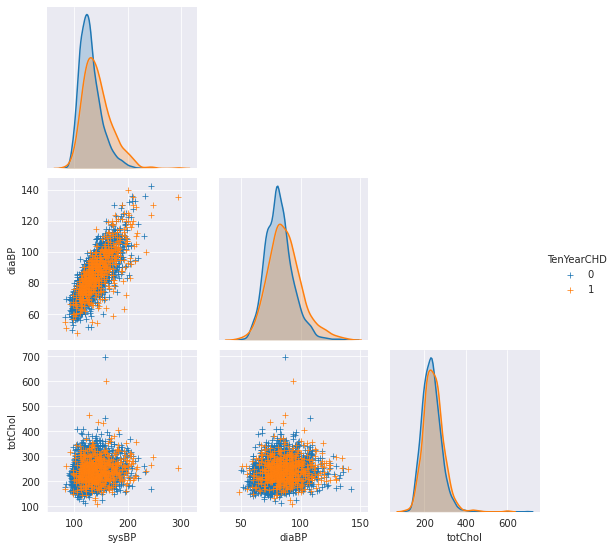

In [47]:
sns.pairplot(df, vars=["sysBP", "diaBP", "totChol"], hue="TenYearCHD", markers="+", corner=True)

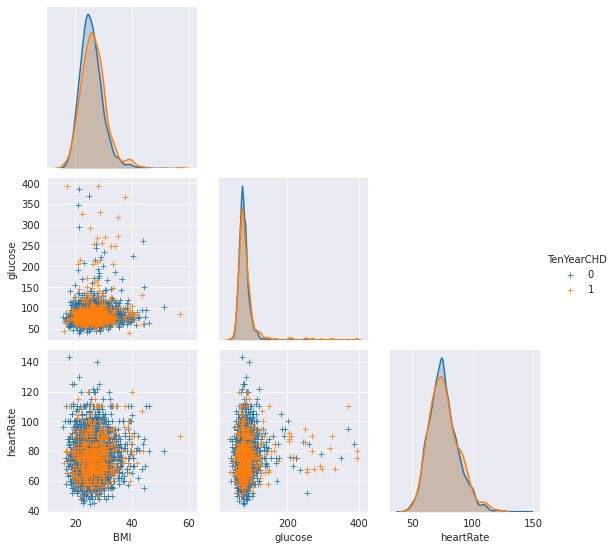

In [48]:
sns.pairplot(df, vars=["BMI", "glucose", "heartRate"], hue="TenYearCHD", markers="+", corner=True)

## Missing values

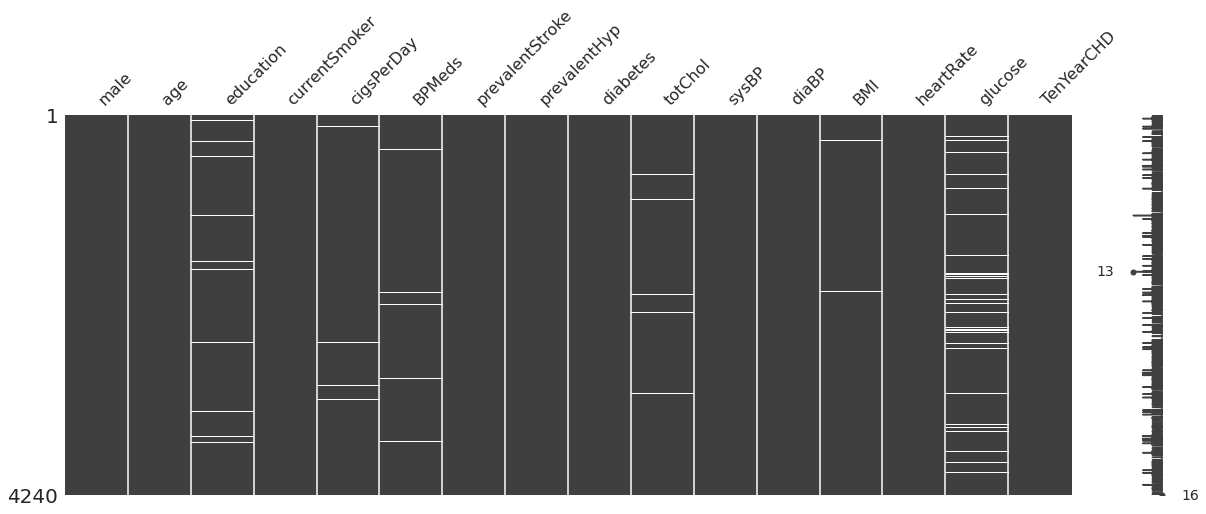

In [53]:
import missingno as msno

msno.matrix(df, figsize=(20, 7))

## Correlation analysis

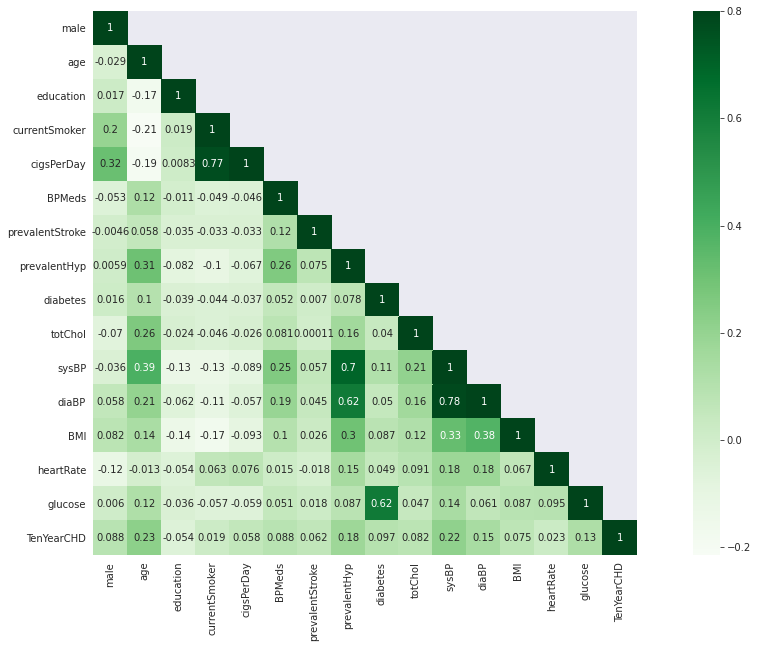

In [54]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)

## Outliers

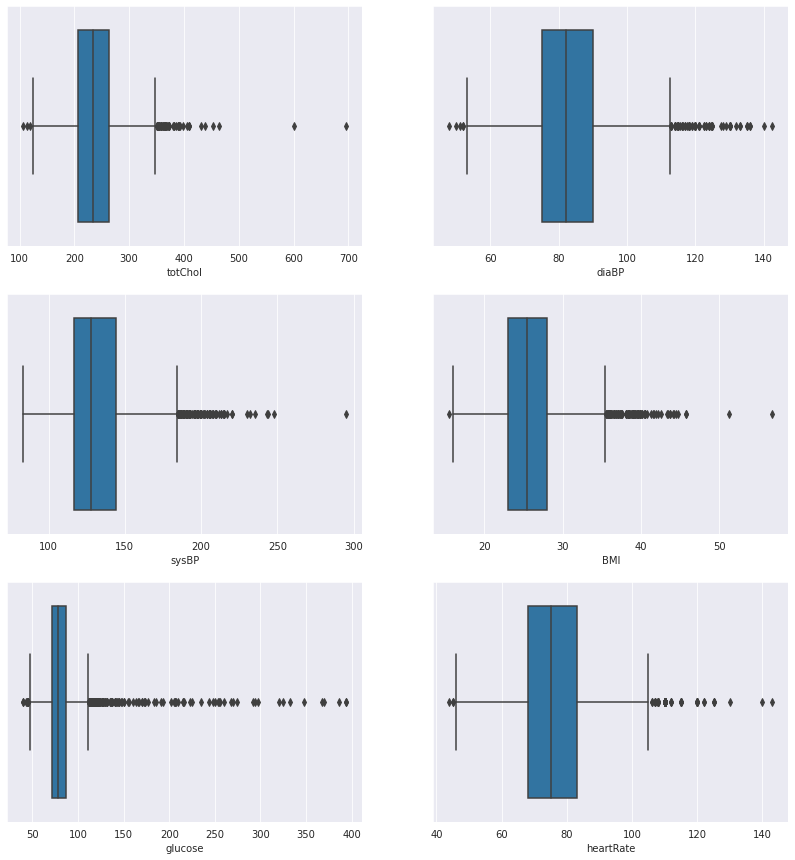

In [55]:
fig = plt.figure(figsize=(14, 15)) 
sns.set_style("darkgrid")

plt.subplot(3, 2, 1)
sns.boxplot(x=df["totChol"])

plt.subplot(3, 2, 2)
sns.boxplot(x=df["diaBP"])

plt.subplot(3, 2, 3)
sns.boxplot(x=df["sysBP"])

plt.subplot(3, 2, 4)
sns.boxplot(x=df["BMI"])

plt.subplot(3, 2, 5)
sns.boxplot(x=df["glucose"])

plt.subplot(3, 2, 6)
sns.boxplot(x=df["heartRate"])

plt.show()

# Data Preprocessing

In [0]:
# DROP EDUCATION COLUMN
df = df.drop(columns=['education'])

# SCALE CONTINUOUS VALUES
scaled_df = df
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_df[['totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']] = scaler.fit_transform(scaled_df[['totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']].to_numpy()) 

# IMPUTE MISSING VALUES USING kNN ALGORITHM
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_filled = imputer.fit_transform(scaled_df)
df_filled = pd.DataFrame(df_filled)

df_filled = df_filled.rename(columns={0: "male", 1: "age", 2: "currentSmoker", 3: "cigsPerDay", 4: "BPMeds", 5: "prevalentStroke", 6: "prevalentHyp", 7: "diabetes", 8: "totChol", 9: "sysBP", 10: "diaBP", 11: "BMI", 12: "heartRate", 13: "glucose", 14: "TenYearCHD"})

# CAST FLOATS -> INTS
df_filled.age = df_filled.age.astype(int)
df_filled.cigsPerDay = df_filled.cigsPerDay.astype(int)
df_filled.currentSmoker = df_filled.currentSmoker.astype(int)
df_filled.male = df_filled.male.astype(int)
df_filled.prevalentHyp = df_filled.prevalentHyp.astype(int)
df_filled.TenYearCHD= df_filled.TenYearCHD.astype(int)


In [86]:
df_filled.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [84]:
df_filled.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.053852,0.029717,0.005896,0.310613,0.025708,0.048241,0.161281,0.059851,0.080788,0.058564,0.238841,0.151887
std,0.495027,8.572942,0.500024,11.909165,0.168897,0.076569,0.462799,0.158280,0.779723,0.816048,0.794026,0.819835,0.801598,1.439678,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.228070,-1.648148,-2.266667,-1.983903,-2.066667,-2.375000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.491228,-0.407407,-0.466667,-0.468813,-0.466667,-0.375000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,0.508772,0.592593,0.533333,0.531187,0.533333,0.505208,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,8.105263,6.185185,4.033333,6.317907,4.533333,19.750000,1.000000


# Machine learning models

In [0]:
# SEPERATE THE DATASET TO X and y
y = df_filled.iloc[:,-1].to_numpy() 
X = df_filled.drop('TenYearCHD', axis=1).to_numpy()

In [0]:
from sklearn import svm

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from mlxtend.plotting import plot_confusion_matrix

from imblearn.over_sampling import SMOTENC

### Support Vector Machines

#### Stratified cross validation

In [105]:
fbeta_score_cv = []
mcc_score_cv = []
recall_score_cv =[]
conf_matrix_list_of_arrays = []


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for train_ix, test_ix in kfold.split(X, y):
  train_X, test_X = X[train_ix], X[test_ix]
  train_y, test_y = y[train_ix], y[test_ix]
  
  svm_model = svm.SVC(C=0.1, kernel='linear', gamma=0.01, class_weight='balanced', max_iter=100000)
  svm_model.fit(train_X, train_y)
  
  mcc = matthews_corrcoef(test_y, svm_model.predict(test_X))
  fbeta = fbeta_score(test_y, svm_model.predict(test_X), beta=2)
  recall = recall_score(test_y, svm_model.predict(test_X))  

  print('MCC score: ', mcc)
  print('Fbeta score: ', fbeta)
  print('Recall: ', recall, '\n')

  fbeta_score_cv.append(fbeta)
  mcc_score_cv.append(mcc)
  recall_score_cv.append(recall)

  conf_matrix = confusion_matrix(test_y, svm_model.predict(test_X))
  conf_matrix_list_of_arrays.append(conf_matrix)

MCC score:  0.2926664790890397
Fbeta score:  0.5548996458087367
Recall:  0.734375 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


MCC score:  0.23182551841481897
Fbeta score:  0.5103211009174312
Recall:  0.689922480620155 

MCC score:  0.20844006351587366
Fbeta score:  0.4842473745624271
Recall:  0.6434108527131783 

MCC score:  0.22647948438373597
Fbeta score:  0.49586776859504134
Recall:  0.6511627906976745 

MCC score:  0.2783106591674885
Fbeta score:  0.5397390272835112
Recall:  0.7054263565891473 



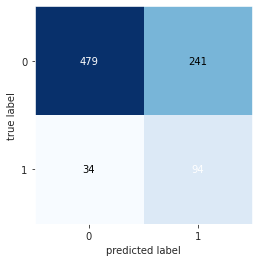

In [106]:
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_list_of_arrays[0])
plt.show()

#### Learning curve to examine overfitting/underfitting

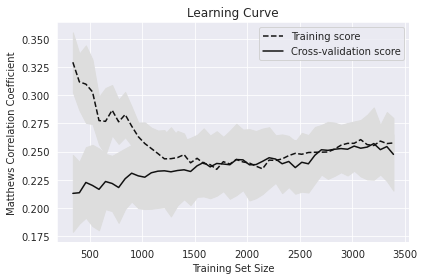

In [109]:
from sklearn.model_selection import learning_curve

from sklearn.metrics import matthews_corrcoef, make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)


svm_model = svm.SVC(C=0.1, kernel='linear', gamma=0.01, class_weight='balanced', max_iter=100000)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(svm_model, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=kfold,
                                                        # Evaluation metric
                                                        scoring=mcc_scorer,
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        #train_sizes=np.linspace(0.01, 1.0, 50))
                                                        train_sizes=np.linspace(0.1, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Matthews Correlation Coefficient"), plt.legend(loc="best")
plt.tight_layout()
plt.show()